In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv(r"C:\Users\Rahul\Desktop\My_Projects\Python\Telco_customer_churn\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.shape

(7043, 21)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#Replacing blank with 0 as tenure is 0 and no total charges are recorded

In [8]:
df['TotalCharges']=df['TotalCharges'].replace(" ",'0')
df['TotalCharges']=df['TotalCharges'].astype(float)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [13]:
 df.duplicated().sum()

0

In [15]:
df["customerID"].duplicated().sum()

0

In [17]:
# To Convert senior citizen column in the form of 'Yes' and 'No' to make it easier to understand

def conv(value):
    if value== 0:
        return "No"
    else:
        return "Yes"

df["SeniorCitizen"]= df["SeniorCitizen"].apply(conv)

In [18]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


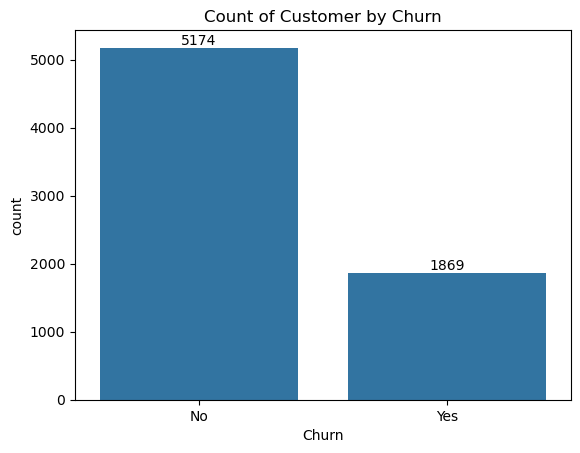

In [39]:
ax= sns.countplot(x='Churn', data= df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customer by Churn")
plt.show()

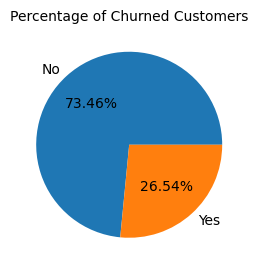

In [41]:
# To show churn values in Percentage we make pie chart
# but before that we need to group by it because it is a string 
plt.figure(figsize=(3,4))
gb= df.groupby('Churn').agg({'Churn':"count"})
plt.pie(gb['Churn'],labels= gb.index, autopct="%1.2f%%")
plt.title("Percentage of Churned Customers", fontsize=10)
plt.show()

#From our pie chart we can conclude that 26.54% of our customers have churned out

#Now let's explore the reason behind it 

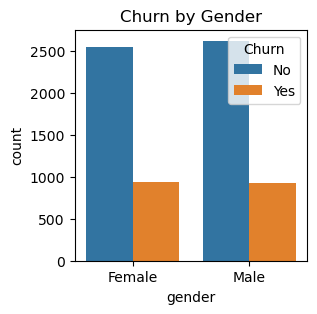

In [42]:
plt.figure(figsize=(3,3))
sns.countplot(x="gender", data= df, hue="Churn")
plt.title("Churn by Gender")
plt.show()
           

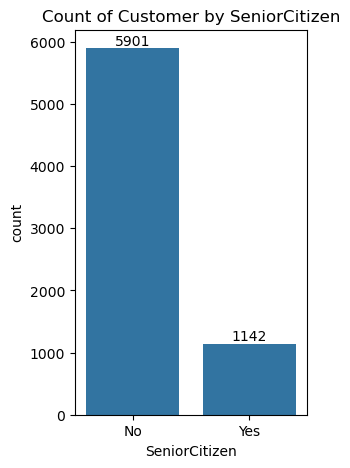

In [54]:
plt.figure(figsize=(3,5))
sc= sns.countplot(x='SeniorCitizen', data= df)
sc.bar_label(sc.containers[0])
plt.title("Count of Customer by SeniorCitizen")
plt.show()

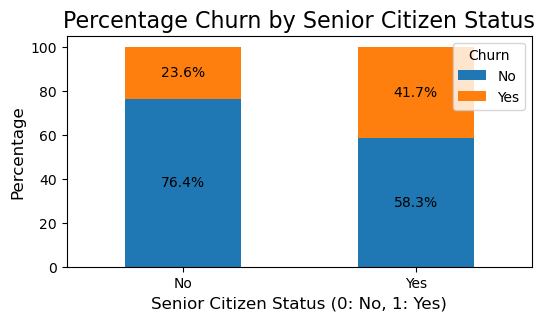

In [61]:

# Calculate the percentages of Churn within each SeniorCitizen group
# and pivot the data for plotting
churn_by_senior_citizen = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).mul(100).unstack()

# Create the stacked bar chart
ax = churn_by_senior_citizen.plot(kind='bar', stacked=True, figsize=(6, 3))

# Add the percentage labels to the bars
for container in ax.containers:
    labels = [f'{v.get_height():.1f}%' if v.get_height() > 0 else '' for v in container]
    ax.bar_label(container, labels=labels, label_type='center', fontsize=10, color='black')

# Set chart title and axis labels
plt.title('Percentage Churn by Senior Citizen Status', fontsize=16)
plt.xlabel('Senior Citizen Status (0: No, 1: Yes)', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Churn', loc='upper right')


#Comparitive a greater percentage of people in senior citizen category have churned

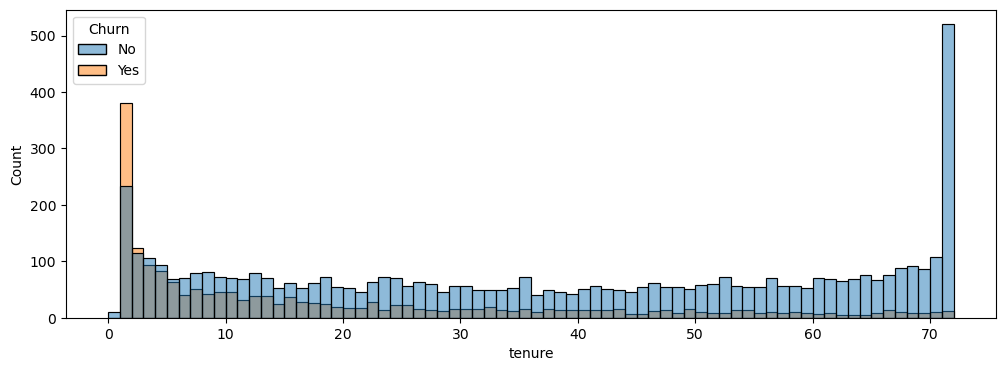

In [77]:
plt.figure(figsize=(12,4))
sns.histplot(x="tenure", data=df,bins=72,hue="Churn")
plt.show()

#People who have used our services for long time have stayed and people who have used our services for 1 or 2 month have churned

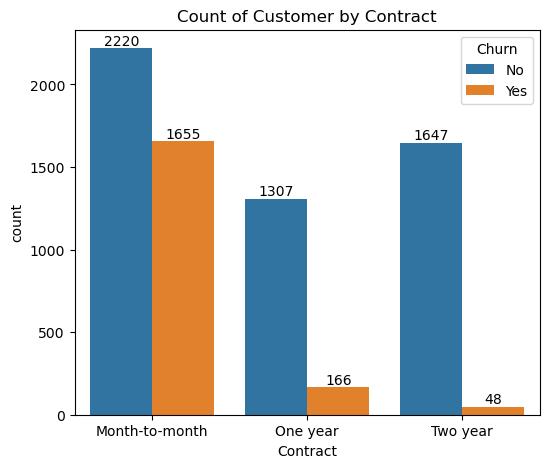

In [105]:
plt.figure(figsize=(6,5))
sc= sns.countplot(x='Contract', data= df, hue="Churn")
sc.bar_label(sc.containers[0])
sc.bar_label(sc.containers[1])
plt.title("Count of Customer by Contract")
plt.show()

#People who have month to month contract are likely to churn then from those who have 1 or 2 years of contract

In [86]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

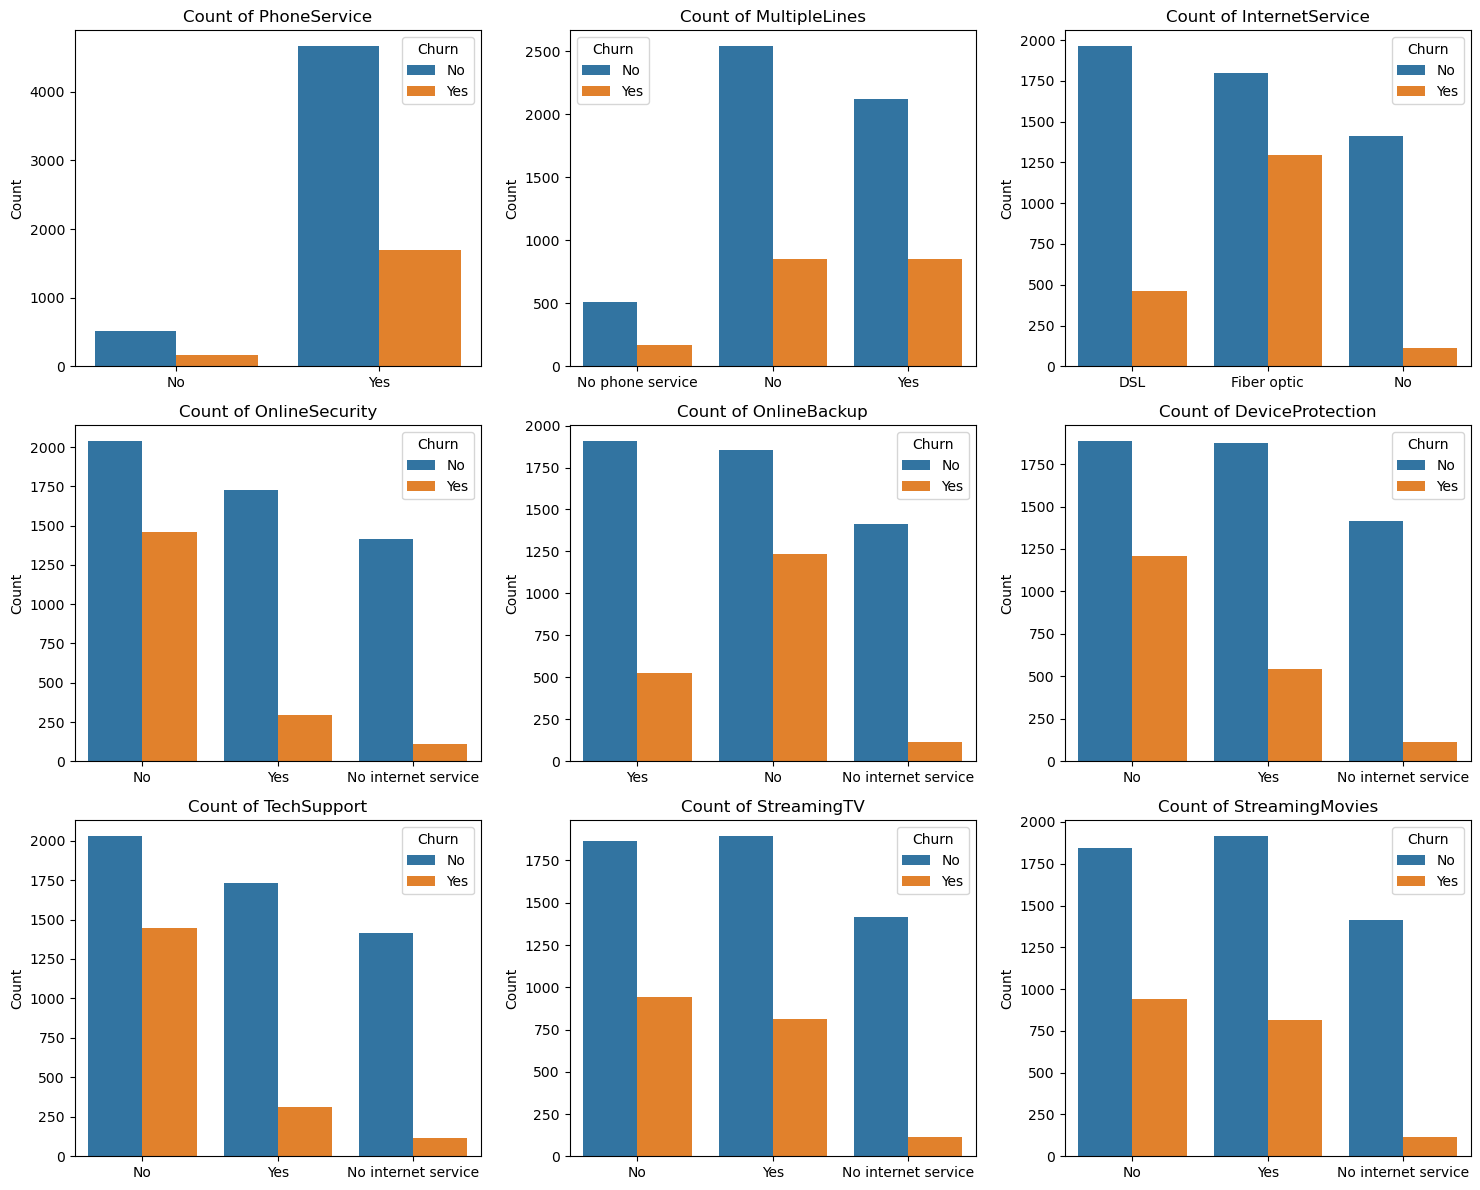

In [98]:
cols = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Define subplot grid (3 rows x 3 columns for 9 plots)
fig, axes = plt.subplots(3, 3, figsize=(15, 12))

# Flatten axes for easy iteration
axes = axes.flatten()

# Loop through columns
for i, col in enumerate(cols):
    sns.countplot(x=df[col], ax=axes[i], hue= df["Churn"])
    axes[i].set_title(f"Count of {col}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")

# Adjust layout
plt.tight_layout()
plt.show()


#The majority of customer who do not churn tend to have services like PhoneService, InternetService(specially DSL) and OnlineSecurity enabled.

#For services like OnlineBackup, TechSupport, StreamingTV, churn rate are noticeably higher when these services are not used or are unavailable

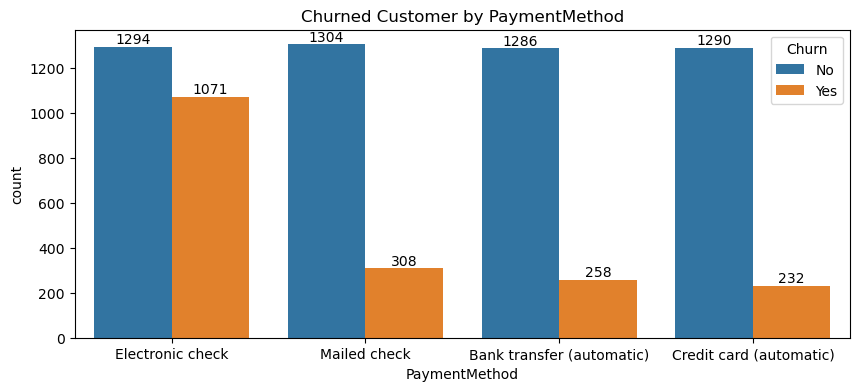

In [104]:
plt.figure(figsize=(10,4))
sc= sns.countplot(x='PaymentMethod', data= df, hue="Churn")
sc.bar_label(sc.containers[0])
sc.bar_label(sc.containers[1])
plt.title("Churned Customer by PaymentMethod")
plt.show()

#Customer is likely to churn when he is using electronic check as a payment method